In [1]:
import sys
import os

try:
    # If running from a .py file
    base_path = os.path.dirname(__file__)
except NameError:
    # If running in Jupyter Notebook
    base_path = os.getcwd()

project_root = os.path.abspath(os.path.join(base_path, "..", ".."))
sys.path.append(project_root)

from rsp.ReliableSpacePredictor import *
import matplotlib
from matplotlib.ticker import MaxNLocator

/Applications/anaconda3/envs/lube/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cpu


In [2]:
def parity_plot(y_test1, y_pred_test1, start, end):
    matplotlib.rcParams['font.family'] = 'Helvetica'
    r2_test = r2_score(y_test1, y_pred_test1)
    rmse_test = np.sqrt(mean_squared_error(y_test1, y_pred_test1))
    
    # Print R^2 and RMSE

    print(f'R2 (Test): {r2_test}')
    print(f'RMSE (Test): {rmse_test}')
    
    # Plot predictions vs actual values
    plt.figure(figsize = [8,8])
    plt.scatter(y_test1, y_pred_test1, s = 70,  color = 'r')
    plt.plot([start, end], [start, end], color='black')
    plt.xlim([start, end])
    plt.ylim([start, end])
    plt.xlabel("Experimental KV40 (cSt)", fontsize = 25)
    plt.ylabel("Predicted KV40 (cSt)", fontsize = 25)
    # plt.legend()
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)     

        # Getting the current axes
    ax = plt.gca()

    # Setting the number of ticks on the x and y axes
    ax.xaxis.set_major_locator(MaxNLocator(nbins=5)) # For x-axis, aiming for 5 ticks
    ax.yaxis.set_major_locator(MaxNLocator(nbins=5)) # For y-axis, aiming for 6 ticks     
    plt.show()

In [3]:
df_train = pd.read_excel('../../Data/lubricants/kv40-train.xlsx')
df_test = pd.read_excel('../../Data/lubricants/kv40-test.xlsx')
X_train = pd.read_csv('../../Data/lubricants/kv40-train_descriptors.csv')
X_test = pd.read_csv('../../Data/lubricants/kv40-test_descriptors.csv')

In [4]:
# Find common columns
common_cols = X_test.columns.intersection(X_train.columns)

# Keep only the common columns
X_train = X_train[common_cols]

# y_vals
y_train = df_train['KV40 (cSt)'].to_numpy()
y_test = df_test['KV40 (cSt)'].to_numpy()

# smis
smis_train = df_train['Smiles'].to_numpy()
smis_test = df_test['Smiles'].to_numpy()

Global

In [5]:
with open('lubricants_global_model_pipeline.pkl', 'rb') as f:
    data_global = pickle.load(f)

globals().update(data_global)

In [40]:
# varaible reference

# to_save_global = {
#     'X_train_uncorr': X_train_uncorr,
#     'rfe_results_global': rfe_results_global,
#     'selected_descriptors_global': selected_descriptors_global,
#     'X_test_selected_global': X_test_selected_global,
#     'X_train_selected_global': X_train_selected_global,
#     'X_train_selected_global_numpy': X_train_selected_global_numpy,
#     'X_test_selected_global_numpy': X_test_selected_global_numpy,
#     'study_global': study_global,
#     'best_params_global': best_params_global,
#     'model_global': model_global,
#     'y_test_pred_global': y_test_pred_global,
#     'test_rmse_global': test_rmse_global
# }

In [6]:
print(f"Test RMSE: {test_rmse_global}")

Test RMSE: 4.44999484474533


R2 (Test): -0.27670779916047206
RMSE (Test): 4.44999484474533


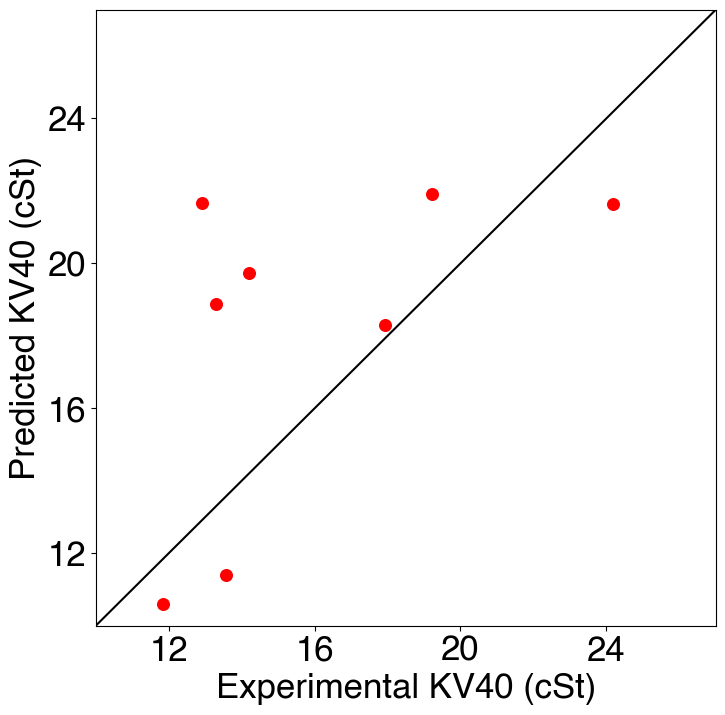

In [7]:
parity_plot(y_test, y_test_pred_global, 10, 27)

Local

In [10]:
import pickle

with open('lubricants_local_model_pipeline.pkl', 'rb') as f:
    data_local = pickle.load(f)

globals().update(data_local)


In [39]:
# varaible reference

# to_save_local = {
#     'RSP': RSP,
#     'base_3D': base_3D,
#     'best_study': best_study,
#     'distances_train_RSP': distances_train_RSP,
#     'train_rmse_RSP': train_rmse_RSP,
#     'model_RSP': model_RSP,
#     'model_params_RSP': model_params_RSP,
#     'n_original_train_data': n_original_train_data,
#     'n_selected_train_data': n_selected_train_data,
#     'drop_rate': drop_rate,
#     'selected_descriptors_RSP': selected_descriptors_RSP,
#     'y_train_RSP_optimized': y_train_RSP_optimized,
#     'X_test_selected_RSP': X_test_selected_RSP,
#     'y_test_pred_RSP': y_test_pred_RSP,
#     'test_rmse_RSP': test_rmse_RSP,
#     'Reff': Reff,
#     'dcp': dcp,
#     'weights_distance': weights_distance,
#     'fps_test': fps_test,
#     'X_2d_test': X_2d_test,
#     'y_test_scaled': y_test_scaled,
#     'y_test_pred_RSP_scaled': y_test_pred_RSP_scaled,
#     'y_test_pred_global_scaled': y_test_pred_global_scaled,
#     'X_3d_test': X_3d_test,
#     'X_3d_test_pred_RSP': X_3d_test_pred_RSP,
#     'X_3d_test_pred_global': X_3d_test_pred_global,
#     'distances_test': distances_test,
#     'distances_test_pred_RSP': distances_test_pred_RSP,
#     'distances_test_pred_global': distances_test_pred_global,
#     'lambda_RSP': lambda_RSP,
#     'lower_dcp': lower_dcp,
#     'upper_dcp': upper_dcp,
#     'coverage_dcp': coverage_dcp,
#     'fcp': fcp,
#     'lower_fcp': lower_fcp,
#     'upper_fcp': upper_fcp,
#     'coverage_fcp': coverage_fcp
# }


In [11]:
print(f"Test RMSE: {test_rmse_RSP}")

Test RMSE: 3.1706953044391


R2 (Test): 0.35184106144825533
RMSE (Test): 3.1706953044391


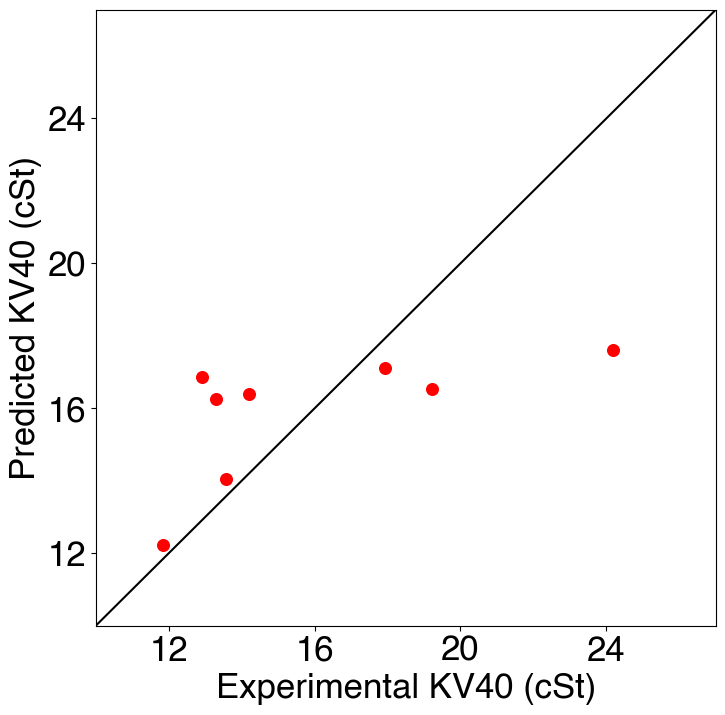

In [14]:
parity_plot(y_test, y_test_pred_RSP, 10, 27)

In [34]:
print(f"DCP Coverage: {coverage_dcp} and FCP Coverage {coverage_fcp}")

DCP Coverage: 0.875 and FCP Coverage 0.875


In [24]:
pearson_train = pearsonr(distances_train_RSP, abs(y_train_RSP_optimized - RSP.best_cv_predictions))[0]
pearson_test = pearsonr(distances_test, abs(y_test - y_test_pred_RSP))[0]

In [25]:
print(f"Pearson coefficient for train set: {pearson_train}")
print(f"Pearson coefficient for test set: {pearson_test}")

Pearson coefficient for train set: -0.007656154176534085
Pearson coefficient for test set: 0.6226663991612617


In [37]:
var_dist_train = np.var(distances_train_RSP)
var_dist_test = np.var(distances_test)
var_res_train = np.var(abs(y_train_RSP_optimized - RSP.best_cv_predictions))
var_res_test = np.var(abs(y_test - y_test_pred_RSP))

In [38]:
print(f"Vairance of distances for train set: {var_dist_train}")
print(f"Vairance of distances for test set: {var_dist_test}")
print(f"Vairance of residuals for train set: {var_res_train}")
print(f"Vairance of residuals for test set: {var_res_test}")

Vairance of distances for train set: 0.058042954903137156
Vairance of distances for test set: 0.10777961260799668
Vairance of residuals for train set: 1.999975082954301
Vairance of residuals for test set: 3.798950711585408


fig 4a

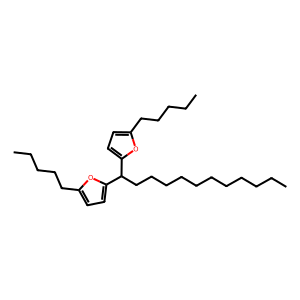

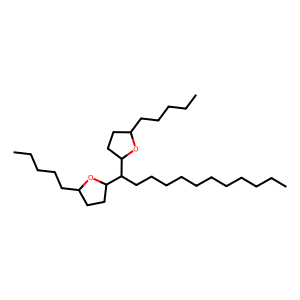

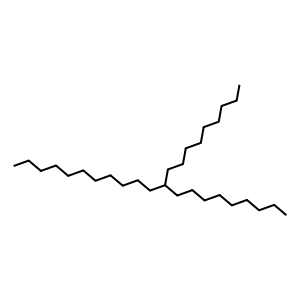

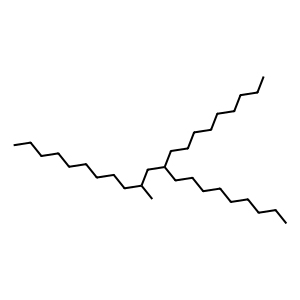

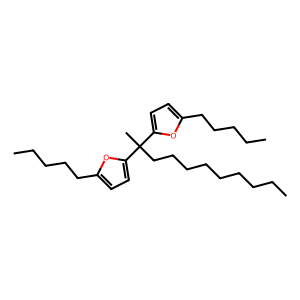

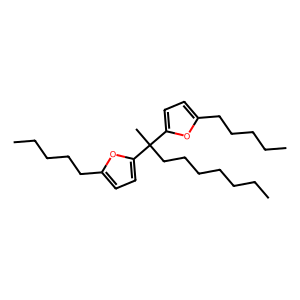

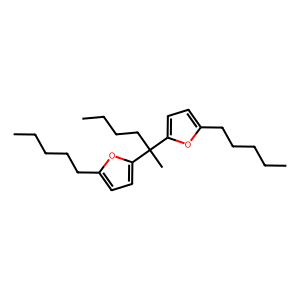

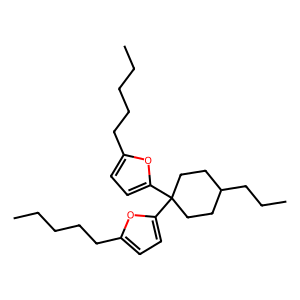

In [16]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image, display
import io

# Loop through selected SMILES
for smi in np.array(smis_test):
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        Chem.rdDepictor.Compute2DCoords(mol)
        drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)  # width, height
        drawer.drawOptions().clearBackground = False  # This makes background transparent
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        png_data = drawer.GetDrawingText()

        # Display image
        display(Image(data=png_data))

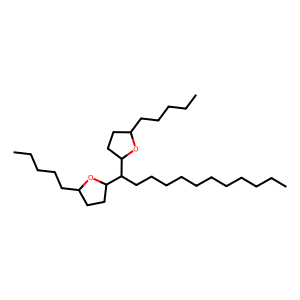

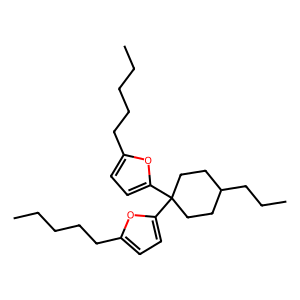

In [17]:
# Loop through selected SMILES
for smi in np.array(smis_test)[[1, 7]]:
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        Chem.rdDepictor.Compute2DCoords(mol)
        drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)  # width, height
        drawer.drawOptions().clearBackground = False  # This makes background transparent
        drawer.DrawMolecule(mol)
        drawer.FinishDrawing()
        png_data = drawer.GetDrawingText()

        # Display image
        display(Image(data=png_data))


fig 4b

In [23]:
 import numpy as np
import plotly.graph_objects as go

# --- Scatter Data ---
fig = go.Figure()
idx_well_predicted = [0,2,3,4,5,6]
idx_poorly_predicted = [1,7]

fig.add_trace(go.Scatter3d(
    x=X_3d_test[idx_well_predicted,0], y=X_3d_test[idx_well_predicted,1], z=X_3d_test[idx_well_predicted,2],
    mode='markers',
    name='Well-predicted',
    marker=dict(size=20, color='green', opacity=0.6)
))
# Test points
fig.add_trace(go.Scatter3d(
    x=X_3d_test[idx_poorly_predicted,0], y=X_3d_test[idx_poorly_predicted,1], z=X_3d_test[idx_poorly_predicted,2],
    mode='markers',
    name='Poorly-predicted',
    marker=dict(size=20, color='red', opacity=0.6)
))

# --- Ellipsoid ---
# Define grid for ellipsoid
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
u, v = np.meshgrid(u, v)
w1, w2, w3 = RSP.optimal_weights
# Radius & weights
a = Reff / np.sqrt(w1)
b = Reff / np.sqrt(w2)
c = Reff / np.sqrt(w3)

# Ellipsoid coordinates
ellip_x = a * np.cos(u) * np.sin(v)
ellip_y = b * np.sin(u) * np.sin(v)
ellip_z = c * np.cos(v)

# Center the ellipsoid (optional)
xc, yc, zc = RSP.centroid  # You can change this to your centroid if needed
ellip_x += xc
ellip_y += yc
ellip_z += zc

fig.add_trace(go.Surface(
    x=ellip_x,
    y=ellip_y,
    z=ellip_z,
    opacity=0.3,
    showscale=False,
    name='Ellipsoid',
    colorscale='Greys',
    hoverinfo='skip'
))

# --- Centroid Marker ---
fig.add_trace(go.Scatter3d(
    x=[xc], y=[yc], z=[zc],
    mode='markers+text',
    name='Centroid',
    marker=dict(
        size=10,
        symbol='x',
        color='black'
    ),
    # text=['Centroid'],
    textposition='top center'
))

# --- Layout ---
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='Kinematic Viscosity (cSt)',
        xaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
        yaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
        zaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
    )
)


fig.show()

fig.write_html("3d_plot.html")


fig 4c

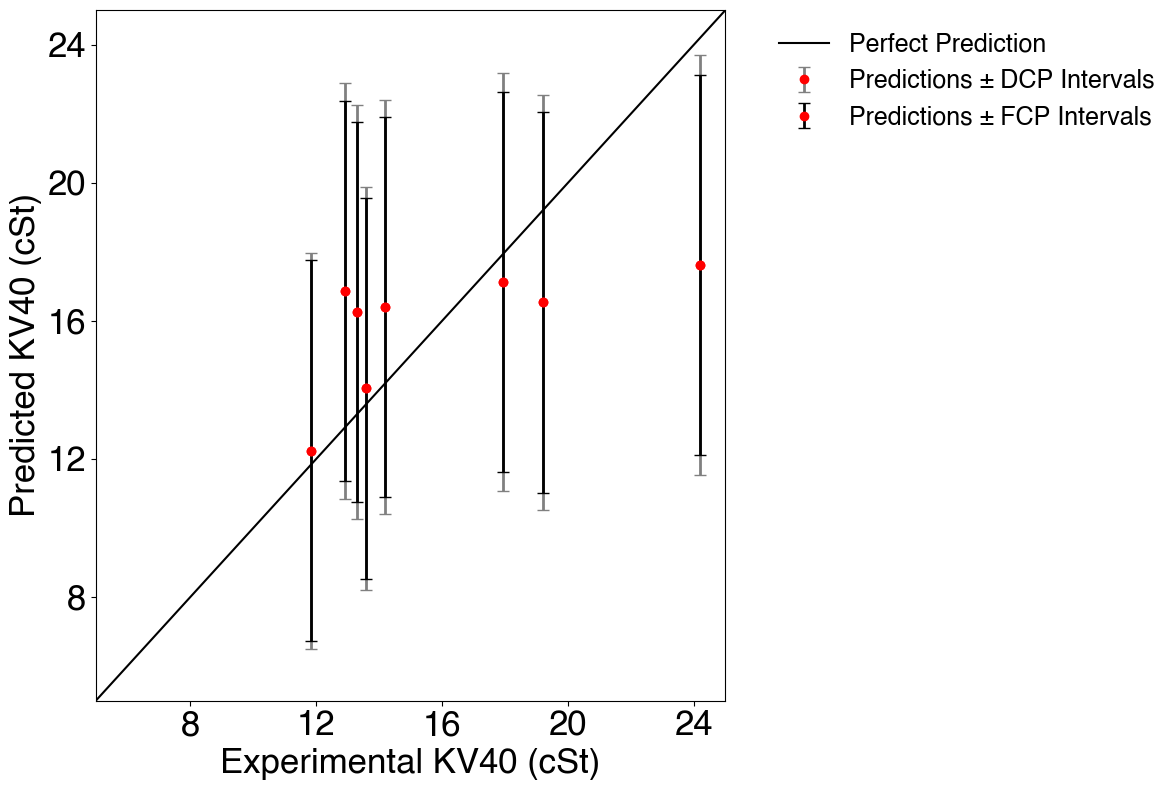

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

# Set font
plt.rcParams['font.family'] = 'Helvetica'

# Optional: if you don't have per-point uncertainty, use a constant RMSE for all
# rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_RSP))
# y_err = np.full_like(y_test_pred_RSP, rmse)
y_err_dcp = (upper_dcp - lower_dcp)/2
y_err_fcp = (upper_fcp - lower_fcp)/2
# Plot
plt.figure(figsize=[12, 8])
plt.errorbar(
    y_test, y_test_pred_RSP, 
    yerr=y_err_dcp, fmt='o', 
    color='red', ecolor='gray', elinewidth=2, capsize=4, label='Predictions ± DCP Intervals'
)
plt.errorbar(
    y_test, y_test_pred_RSP, 
    yerr=y_err_fcp, fmt='o', 
    color='red', ecolor='k', elinewidth=2, capsize=4, label='Predictions ± FCP Intervals'
)
# Parity line
start, end = [5, 25]
plt.plot([start, end], [start, end], color='black', label='Perfect Prediction')

# Labels & ticks
plt.xlim([start, end])
plt.ylim([start, end])
plt.xlabel("Experimental KV40 (cSt)", fontsize=25)
plt.ylabel("Predicted KV40 (cSt)", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

# Ticks and grid
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))

plt.legend(fontsize=18, loc='upper left', bbox_to_anchor=(1.05, 1.0), frameon=False)
plt.tight_layout()
plt.show()


fig 4d

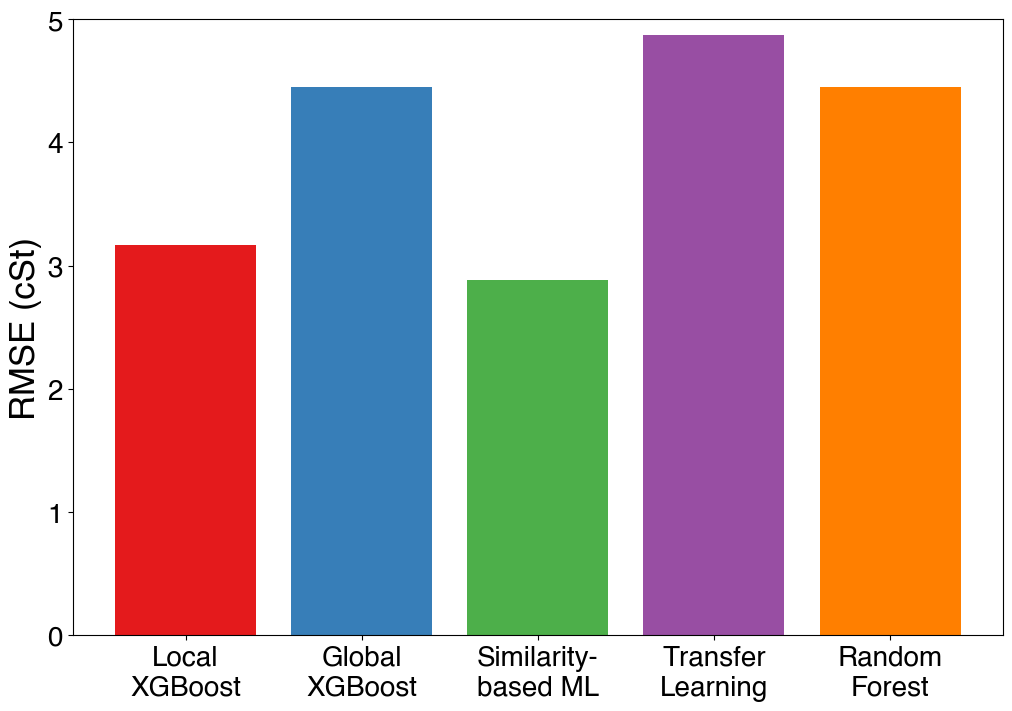

In [13]:
# Predicted to be in domain
categories = [
    'Local\nXGBoost', 
    'Global\nXGBoost', 
    'Similarity-\nbased ML', 
    'Transfer\nLearning', 
    'Random\nForest'
]
lube_RMSE = np.array([3.17 , 4.45,  2.88, 4.87, 4.45])
color_list = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00']

x = np.arange(len(categories))
# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Updated colors
ax.bar(x, lube_RMSE, color=color_list)  # Warm & vibrant
# ax.bar(x + width/2, CI_cov_fcp, width, color='seagreen')  # Cool & distinct
# ax.axhline(y=0.9, color='black', linestyle='dashed', linewidth=3)


# Labels, ticks, and title
ax.set_ylabel('RMSE (cSt)', fontsize=25, fontname='Helvetica')
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=20, fontname='Helvetica')
# ax.set_xticklabels(categories, fontsize=20, fontname='Helvetica', rotation=20, ha='right')

# Adjust Y-axis ticks
ax.set_yticks(np.linspace(0, 5.0, 6))
ax.set_ylim(0.0, 5)
ax.tick_params(axis='y', labelsize=20)

plt.show()



toc

In [20]:
fps_train = RSP.generate_fingerprints(smis_train)
X_2d_train = RSP.pca.transform(fps_train)
y_train_scaled = RSP.scaler(y_train)
X_3d_train = np.column_stack([X_2d_train, y_train_scaled])
distances_train = RSP.get_distances(X_3d_train, weights_distance)

Generating fingerprints...


In [21]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=X_3d_test[:,0], y=X_3d_test[:,1], z=X_3d_test[:,2],
    mode='markers',
    name='Test',
    marker=dict(size=15, color='red', opacity=1)
))
# Test points
fig.add_trace(go.Scatter3d(
    x=X_3d_train[:,0], y=X_3d_train[:,1], z=X_3d_train[:,2],
    mode='markers',
    name='Train',
    marker=dict(size=15, color='blue', opacity=0.6)
))

# --- Ellipsoid ---
# Define grid for ellipsoid
u = np.linspace(0, 2 * np.pi, 50)
v = np.linspace(0, np.pi, 50)
u, v = np.meshgrid(u, v)
w1, w2, w3 = RSP.optimal_weights
# Radius & weights
a = Reff / np.sqrt(w1)
b = Reff / np.sqrt(w2)
c = Reff / np.sqrt(w3)

# Ellipsoid coordinates
ellip_x = a * np.cos(u) * np.sin(v)
ellip_y = b * np.sin(u) * np.sin(v)
ellip_z = c * np.cos(v)

# Center the ellipsoid (optional)
xc, yc, zc = RSP.centroid  # You can change this to your centroid if needed
ellip_x += xc
ellip_y += yc
ellip_z += zc

fig.add_trace(go.Surface(
    x=ellip_x,
    y=ellip_y,
    z=ellip_z,
    opacity=0.3,
    showscale=False,
    name='Ellipsoid',
    colorscale='Greys',
    hoverinfo='skip'
))

# --- Centroid Marker ---
fig.add_trace(go.Scatter3d(
    x=[xc], y=[yc], z=[zc],
    mode='markers+text',
    name='Centroid',
    marker=dict(
        size=7,
        symbol='x',
        color='black'
    ),
    # text=['Centroid'],
    textposition='top center'
))

# --- Layout ---
fig.update_layout(
    scene=dict(
        xaxis_title='PC1',
        yaxis_title='PC2',
        zaxis_title='Property',
        xaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
        yaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
        zaxis=dict(
            titlefont=dict(family='Helvetica', size=25),
            tickfont=dict(family='Helvetica', size=15)
        ),
    )
)
fig.write_html("TOC.html")

fig.show()